Importing libraries

In [2]:
import imagej
import numpy as np
import matplotlib.pyplot as plt

# initialize ImageJ
ij = imagej.init('sc.fiji:fiji:2.14.0')
print(f"ImageJ version: {ij.getVersion()}")

ImageJ version: 2.14.0/1.54f


Defining preprocessing function

In [3]:
def tif_preprocessing(n): #Returns cleaned up image as NumPy array
    
    original = np.asarray(ij.py.from_java(n))

    ij.IJ.run(n, "Convert to Mask", '10.06')

    for i in range(3):
        ij.IJ.run(n, "Despeckle", "")

    noisy = np.asarray(ij.py.from_java(n))

    for i in range(1):
        ij.IJ.run(n, "Subtract Background...", "rolling=2")

    noise = np.asarray(ij.py.from_java(n))

    cleaned_up = noisy - noise

    binary_mask = cleaned_up / 255 # White pixels get value 1 - Black pixels get value 0
    final = binary_mask * original

    rows = cleaned_up.shape[0]
    cutoff = int(rows * 0.934)  
    final = final[:cutoff, :]

    return final 

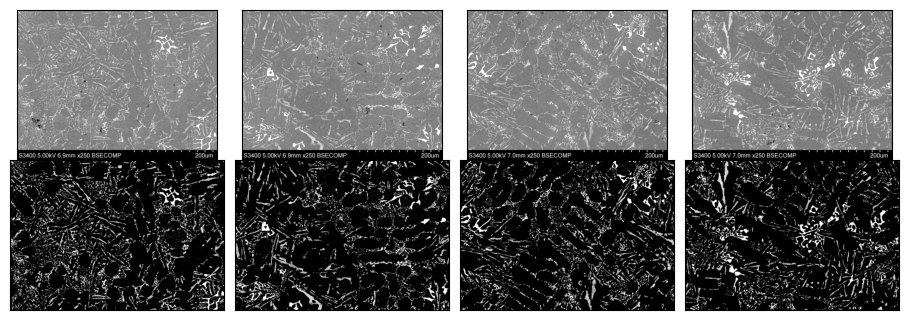

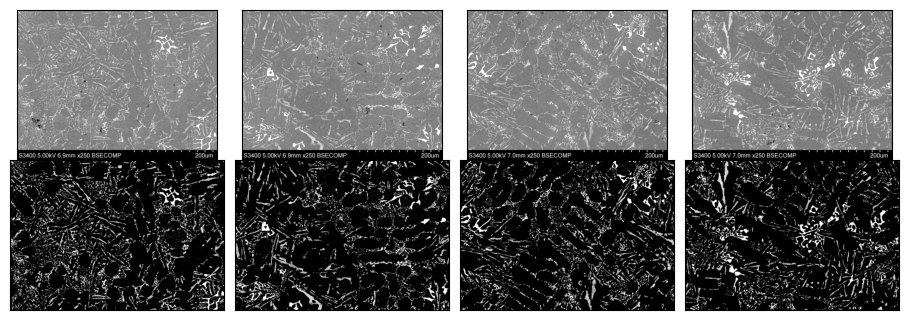

In [ ]:
import tifffile as tiff

imp = ij.IJ.openImage("C:/Users/magfa/Documents/Prosjekt/Prosjektbilder/SEM Fe tilsetning og kjølerate/6ps/BSE_x250_m007.tif")
imp2 = ij.IJ.openImage("C:/Users/magfa/Documents/Prosjekt/Prosjektbilder/SEM Fe tilsetning og kjølerate/6ps/BSE_x250_m006.tif")
imp3 = ij.IJ.openImage("C:/Users/magfa/Documents/Prosjekt/Prosjektbilder/SEM Fe tilsetning og kjølerate/6ps/BSE_x250_m005.tif")
imp4 = ij.IJ.openImage("C:/Users/magfa/Documents/Prosjekt/Prosjektbilder/SEM Fe tilsetning og kjølerate/6ps/BSE_x250_m004.tif")

fig, axarr = plt.subplots(2, 4)

ax0 = axarr[0, 0]
ax1 = axarr[1, 0]
ax2 = axarr[0, 1]
ax3 = axarr[1, 1]
ax4 = axarr[0, 2]
ax5 = axarr[1, 2]
ax6 = axarr[0, 3]
ax7 = axarr[1, 3]

ax0.imshow(tiff.imread("C:/Users/magfa/Documents/Prosjekt/Prosjektbilder/SEM Fe tilsetning og kjølerate/6ps/BSE_x250_m007.tif"), cmap='Grays_r')
ax1.imshow(tif_preprocessing(imp), cmap='Grays_r')
ax2.imshow(tiff.imread("C:/Users/magfa/Documents/Prosjekt/Prosjektbilder/SEM Fe tilsetning og kjølerate/6ps/BSE_x250_m006.tif"), cmap='Grays_r')
ax3.imshow(tif_preprocessing(imp2), cmap='Grays_r')
ax4.imshow(tiff.imread("C:/Users/magfa/Documents/Prosjekt/Prosjektbilder/SEM Fe tilsetning og kjølerate/6ps/BSE_x250_m005.tif"), cmap='Grays_r')
ax5.imshow(tif_preprocessing(imp3), cmap='Grays_r')
ax6.imshow(tiff.imread("C:/Users/magfa/Documents/Prosjekt/Prosjektbilder/SEM Fe tilsetning og kjølerate/6ps/BSE_x250_m004.tif"), cmap='Grays_r')
ax7.imshow(tif_preprocessing(imp4), cmap='Grays_r')

ax0.set_xticks([])
ax0.set_yticks([])
ax1.set_xticks([])
ax1.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([])
ax3.set_xticks([])
ax3.set_yticks([])
ax4.set_xticks([])
ax4.set_yticks([])
ax5.set_xticks([])
ax5.set_yticks([])
ax6.set_xticks([])
ax6.set_yticks([])
ax7.set_xticks([])
ax7.set_yticks([])

fig.subplots_adjust(left=0,bottom=0, right=1, top=1, hspace=0, wspace=0)

fig.set_figheight(3)
fig.set_figwidth(9)
fig.savefig("Preprocessing", dpi=300)

fig